Display the interactive output of matplotlib inline. Run the following command and the resulting plots will be saved in this notebook. If you do not need it, just keep it here and move to the next cell.

In [1]:
%matplotlib notebook

# Compare multiple CPi models

This tutorial describes how to compare mutiple processes or between cpi models. How different solvers perform in the same model can also be compared here. Follow these documents and run the code cell below, you will get the relevant outputs.

## Load the single model of cpi

'multipleSimulate' is a .py file to get the information of multiple cpi models. You can also simulate the selected processes with it. After it is imported, we can call the functions in this notebook.

In [2]:
import sys
sys.path.append('..')
from CPiSimulate import multipleSimulate

## Select cpi file and process

The class 'Simulate(process_num, model_input)' in singleSimulate is to fetch and store the information in multiple cpi files. Once you load this class, several existing cpi files from local will be selected. Then a cpi model in Juypter is created.

In the following example, a model named 'cpi_model' will be created. User need to input the names of selected model in 'model_input' to initiate this library. Existing models can be found in the file 'cpi_python/models'.

The first parameter 'processes_num' stands for the number of selected processes. It can be the integer from 2 to 4. Same models and same processes are allowed in the comparison. This number should be the same as the number of input models in 'model_input'. Once selected, their filenames and process names will be printed below.

In [3]:
model_input = ['abcd', 'kai+jpto-eq', 'mapk']
con_model = multipleSimulate.Simulate(3, model_input)

Select the model: abcd
The processes in this cpi model are:
Pi
Select the model: kai+jpto-eq
The processes in this cpi model are:
Kai, PTO, KaiPTO, KaiPTO2
Select the model: mapk
The processes in this cpi model are:
MAPK


## Simulate the selected processes

With this function you can solve the odes with selected solver and store the outputs of simulation. The outputs of first m odes will be plotted in the same figure to describe the concentration change of the species in the model. You can also choose to save the output figure or just display it in the notebook. 

* compare_model(process_input, solver, t_start, t_final, t_divide)

The value 'process_input' should be the processes in the corresponding cpi models, the number of them should be the same as the 'processes_num' in the previous step.

The parameter 'solver' determines which ode solver will solve this process, you can select from these two:
* odeint
* GLIMDA

The default ode solver is 'odeint' and it can solve most of the models. If this solver dose not satifiy your demands or cannot solve this model, you can use the 'GLIMDA' solver. In this case, it may take about 3 to 5 minutes to solve this complex model.

The next three input value should be positive float numbers, they are the time to start and end a process, and the number of points during this period. These parameters should be numerical.

#### The last paramter (number of points) is optional. However, if you leave it as zero, this function will use the 'GLIMDA' solver by default even you select 'odeint' at the very beginning.

This step will return a solution object for further operations. This object provides methods to plot or show numerical solutions.

In [4]:
process_input = ['Pi', 'PTO', 'MAPK']
compare_solution = con_model.compare_model(process_input, 'odeint', 0, 10, 100)

Time Start: 0.0, Time End: 10.0, Number of Times: 100.
There is no common species in selected processes.


## Plot the simulation

This method is in the solution object, which is returned in the simulation step.

* show_plot(select_one, plot_type)

The first input value 'select_one' stands for the common species that user tends to emphasize in figure. If common species are discovered in these processes, they will be printed after the simulation. If you prefer to compare some of these common species, you can enter their names in the text of 'select_species' for input comparing species. Each of the species' name should be separated by a space character. Their solutions will be plotted with the solid style, others will be dotted lines. If you prefer to emphasize all the common species, you can enter 'all' to plot all lines. However, if you do not need to emphasize them, you can leave this text as empty string.

The second input variable 'plot_type' represent the type to plot the figure. Two plot types are supported in this function. All the solutions can be plotted together in a single figure or separately in several figures.

* single
* separate

Users can interact with the labels in the figure here. Click on the different line labels and their line styles will be changed.

The default sequence of line styles are: '-', '--', '-.', ':' and unvisiable. Once the users click on the relevant labels, it will change according to this sequence. However, if you occasion to make a line unvisiable, click the same area on the label may turn it into the original style.


<IPython.core.display.Javascript object>


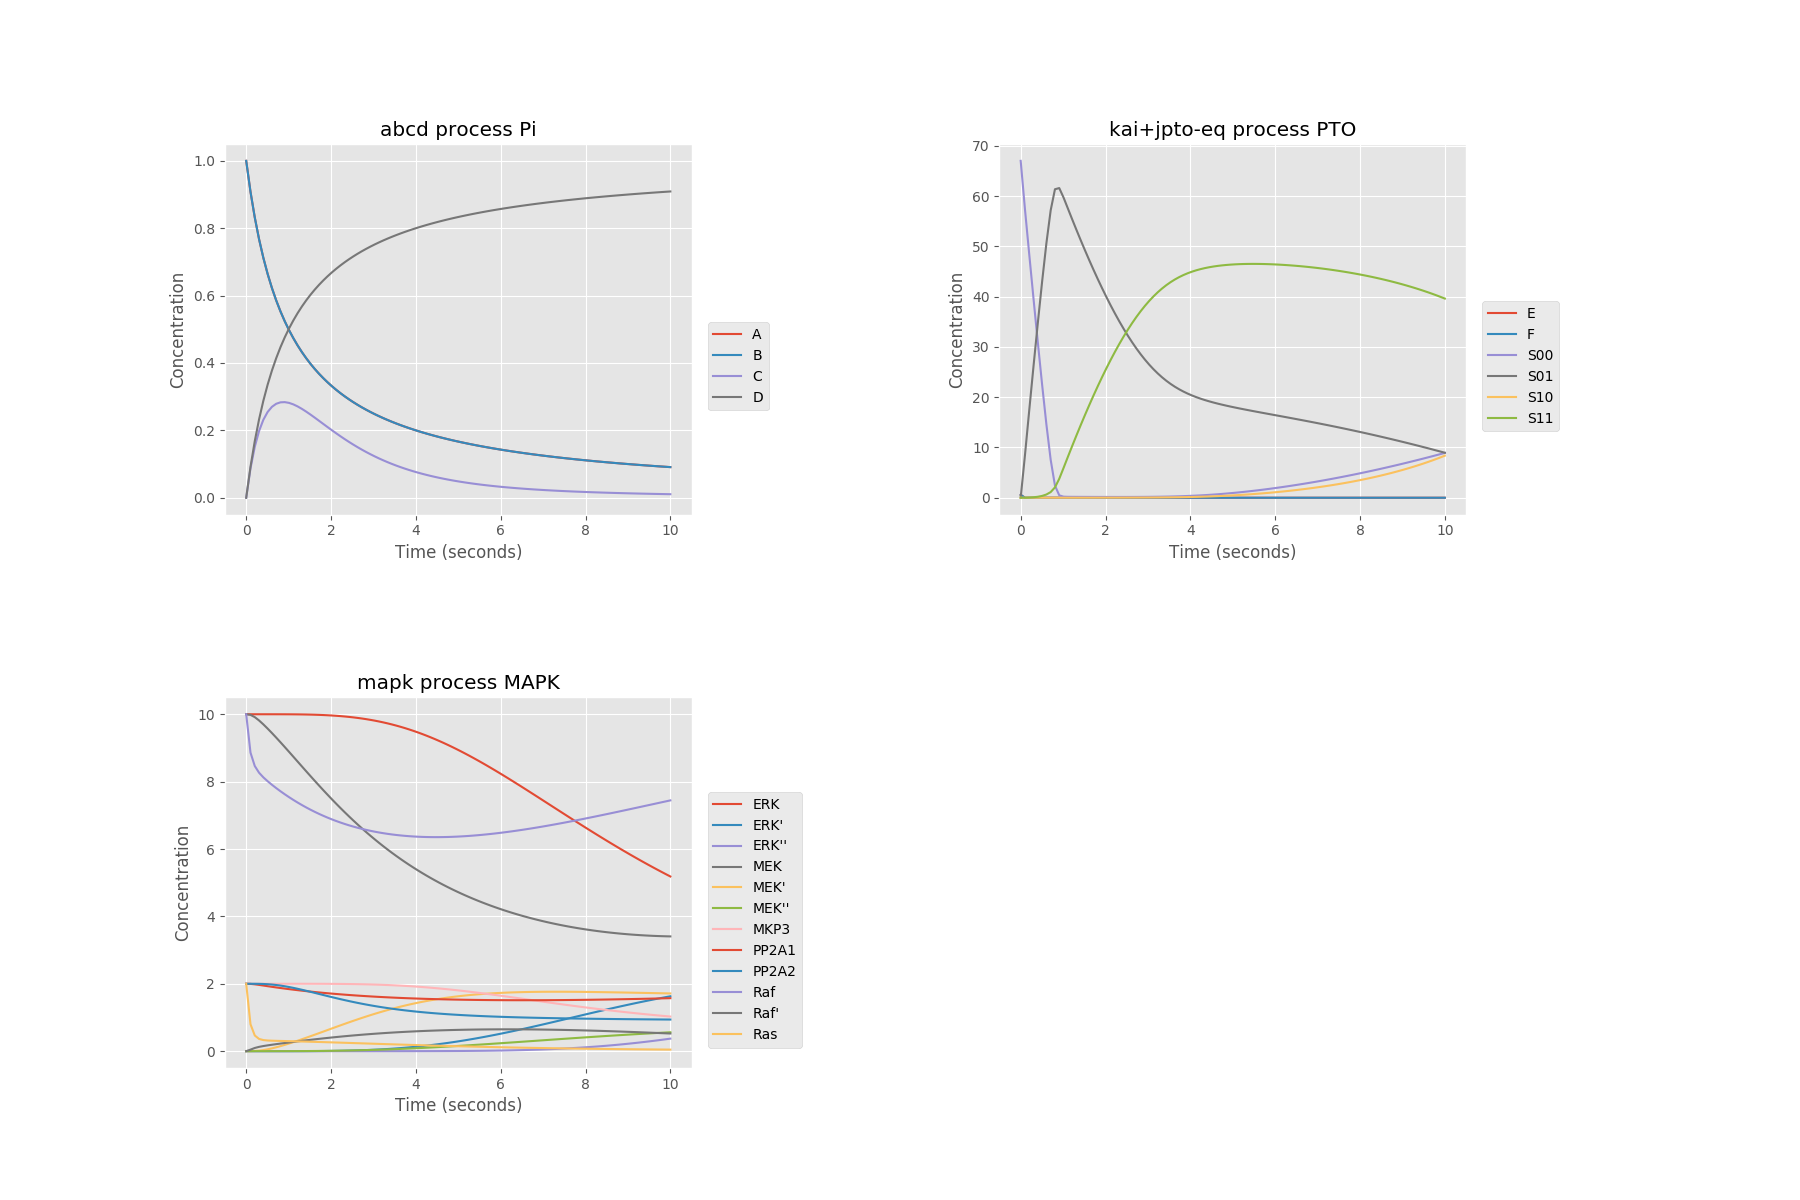

In [5]:
select_species = ''
compare_solution.show_plot(select_species,'separate')